In [136]:
#import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')

# Set the folder path where the CSV files are located
folderpath = 'game_data_watched'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folderpath) if f.endswith('.csv')]

# Loop through each CSV file and read it into a DataFrame
dfs = []
for csv_file in csv_files:
    file_path = os.path.join(folderpath, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
category_df = pd.concat(dfs, ignore_index=True)

In [130]:
category_df

,Year,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Language
0,2018,League of Legends,2678686860,30452220,108695,204,20150,5097,57,87.96,Chinese
1,2018,Hearthstone,1741260840,4863600,37559,85,4988,3313,9,358.02,Chinese
2,2018,Music,1603313160,2318040,13085,11,699,3050,4,691.67,Chinese
3,2018,PUBG: BATTLEGROUNDS,1451157480,24016320,47270,225,16890,2761,45,60.42,Chinese
4,2018,IRL,1284889440,11018040,28782,109,9692,2444,20,116.62,Chinese
...,...,...,...,...,...,...,...,...,...,...,...
1995,2022,Golf With Your Friends,60371100,216960,59688,15,1621,114,0,278.26,Portuguese
1996,2022,Horizon Forbidden West,59962680,2964420,23214,241,4458,114,5,20.23,Portuguese
1997,2022,Pokémon Legends: Arceus,58868460,2066820,32428,284,2986,112,3,28.48,Portuguese
1998,2022,Stumble Guys,58041000,7991160,17079,92,42180,110,15,7.26,Portuguese


In [131]:
#iolsate total watch time
language_year = category_df.groupby(['Year','Language']).sum()
language_year_df = pd.DataFrame(language_year).reset_index()
language_year_df.head()

,Year,Language,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio
0,2018,Chinese,14522668320,176056800,1264214,3965,148184,27580,292,19019.69
1,2018,English,256978524960,6913397160,15850235,111303,11218666,488933,13106,11209.68
2,2018,Korean,29420214000,384766920,2442234,7807,303562,55927,684,17372.13
3,2018,Portuguese,20202113580,319068660,2370183,5017,528953,38393,568,23329.76
4,2019,Chinese,15923881020,216772680,1389825,5574,153572,30246,371,14933.59


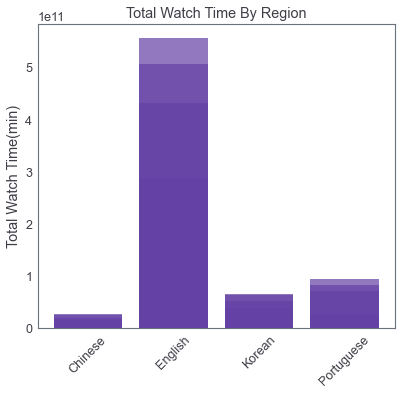

In [132]:
#bar graph for total watch time
#make the year side by side somehow??
x_axis = language_year_df['Language']
y_axis = language_year_df['Watch time (mins)']

fig1 = plt.bar(x_axis,y_axis,color = "#6441A5", alpha = 0.70)
plt.xticks(rotation =45)

plt.title('Total Watch Time By Region')
plt.ylabel('Total Watch Time(min)')
plt.grid()

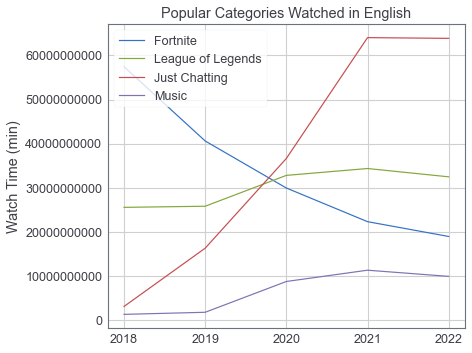

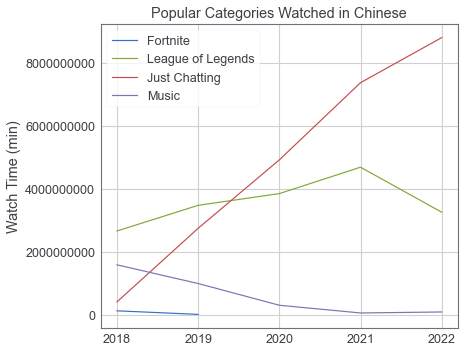

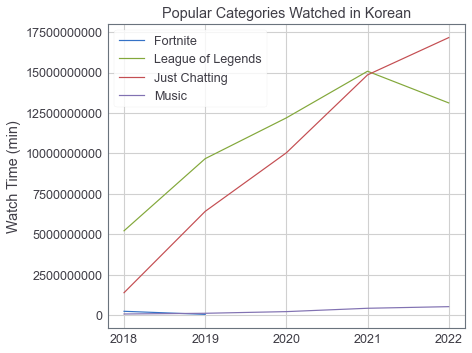

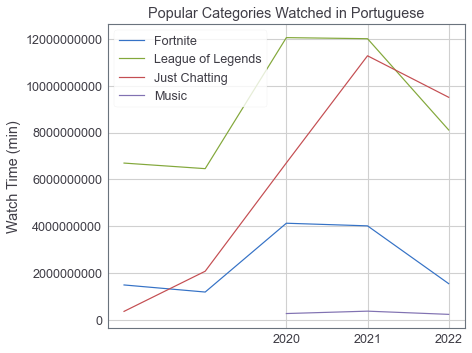

In [133]:
#List of Category to loop through
categ = ['Fortnite','League of Legends','Just Chatting','Music']

#function to isolate cateogry and langauge, sorted by year
def trend_category(category_df, category, language):
    fig, ax = plt.subplots()
    ax.set_title(f"Popular Categories Watched in {language}")
    ax.set_ylabel("Watch Time (min)")
    ax.ticklabel_format(style="plain")
#loops through category
    for categor in category:
        top = (category_df[category_df["Game"] == categor]
            .sort_values(by="Year", ascending=False)
            .loc[category_df["Language"] == language])
        
        ax.plot(top["Year"], top["Watch time (mins)"], label=categor)
        ax.legend(loc='upper left')

    plt.xticks(top["Year"])
    plt.show()

eng = trend_category(category_df, category, 'English')
cn = trend_category(category_df, category, 'Chinese')
kr = trend_category(category_df, category, 'Korean')
pr = trend_category(category_df, category, 'Portuguese')

In [145]:
#Rename this column because no space
category_df["Watch_time"] = category_df["Watch time (mins)"]

# Performing two-way ANOVA - testing game watch time influenced by: Lang and Year
model = ols('Watch_time ~ Language + Year +\
Language:Year', data=category_df).fit()

result = sm.stats.anova_lm(model, type=2)
result

,df,sum_sq,mean_sq,F,PR(>F)
Language,3.0,5.031532e+21,1.677177e+21,99.592858,4.569546e-60
Year,1.0,2.978295e+20,2.978295e+20,17.685484,2.721556e-05
Language:Year,3.0,3.394935e+20,1.131645e+20,6.719848,1.646957e-04
Residual,1992.0,3.354595e+22,1.684034e+19,NaN,NaN


In [146]:
category = ['Fortnite','League of Legends','Just Chatting','Music']
language = ['Chinese','English','Korean','Portuguese']

def trend_category():
    reg = pd.DataFrame()
    for cate, lang in zip(category,language):
        region = category_df.loc[category_df['Language'] == lang]
        game = category_df[category_df['Game'] == cate].sort_values(by = "Year", ascending = False)
        reg = reg.append(game)
    return reg

results = trend_category()
results

,Year,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Language,watch_time,stream_time,Watch_time,Stream_time
1705,2022,Fortnite,18916930920,1533362820,572725,33051,2552005,35995,2917,12.34,English,18916930920,1533362820,18916930920,1533362820
1906,2022,Fortnite,1546389420,113552700,74044,2962,152542,2942,216,13.62,Portuguese,1546389420,113552700,1546389420,113552700
1307,2021,Fortnite,22277855100,712737840,416402,10563,1491683,42390,1356,31.26,English,22277855100,712737840,22277855100,712737840
1505,2021,Fortnite,4015074600,102706080,102844,2036,147009,7639,195,39.09,Portuguese,4015074600,102706080,4015074600,102706080
903,2020,Fortnite,29913864120,1060402800,517419,13137,2235117,56764,2012,28.21,English,29913864120,1060402800,29913864120,1060402800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2019,Music,1712553180,78038400,36235,263,53633,3258,148,21.95,English,1712553180,78038400,1712553180,78038400
403,2019,Music,1010417460,4248840,14988,18,577,1922,8,237.81,Chinese,1010417460,4248840,1010417460,4248840
134,2018,Music,1238780460,54076500,47603,218,46455,2357,102,22.91,English,1238780460,54076500,1238780460,54076500
249,2018,Music,68227680,1782960,18167,22,2557,129,3,38.27,Korean,68227680,1782960,68227680,1782960


In [151]:
#Rename this column because no space
results["Watch_time"] = results["Watch time (mins)"]

# Performing two-way ANOVA - testing game watch time influenced by: Lang and Year
model3 = ols(
    'Watch_time ~ Game + Language + Year +\
    Game:Language + Game:Year + Language:Year + Game:Language:Year', data=results).fit()

sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
Game,2.026104e+21,3.0,82.092624,3.849577e-17
Language,7.506528e+21,3.0,304.145558,1.467552e-27
Game:Language,2.019353e+21,9.0,27.273026,2.297857e-14
Year,4.485149e+20,1.0,54.518073,5.511760e-09
Game:Year,1.943054e+21,3.0,78.727656,7.870617e-17
Language:Year,3.413111e+20,3.0,13.829063,2.474349e-06
Game:Language:Year,1.730402e+21,9.0,23.370508,2.941443e-13
Residual,3.290761e+20,40.0,NaN,NaN


In [154]:
results["Watch_time"] = results["Watch time (mins)"]
model3 = ols(
    'Watch_time ~ Game + Language +\
    Game:Language', data=results).fit()

sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
Game,1.935146e+21,3.0,7.904385,1.744476e-04
Language,7.339589e+21,3.0,29.979616,1.080788e-11
Game:Language,1.602114e+21,9.0,2.181355,3.708775e-02
Residual,4.569961e+21,56.0,NaN,NaN
